<a href="https://colab.research.google.com/github/Kingsleyohio/Imagery/blob/main/Image_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgdal-dev is already the newest version (3.3.2+dfsg-2~focal2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
JPEG
RGB
(427, 454)


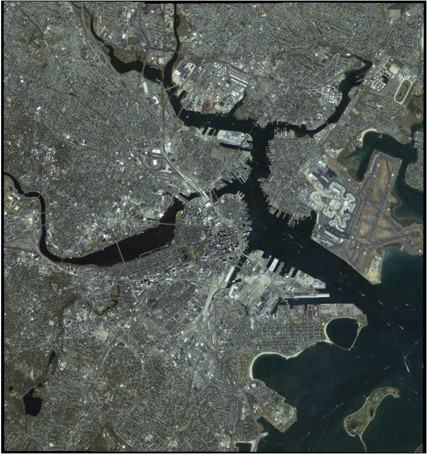

In [48]:
from PIL import Image
import cv2
import os #to create an output folder path
!apt-get install -y libgdal-dev

# Open the image file
image = Image.open('/content/Boston_img.jpg')

#Descriptive Stats
print(image.format)
print(image.mode)
print(image.size)
# Display the image
image.show()

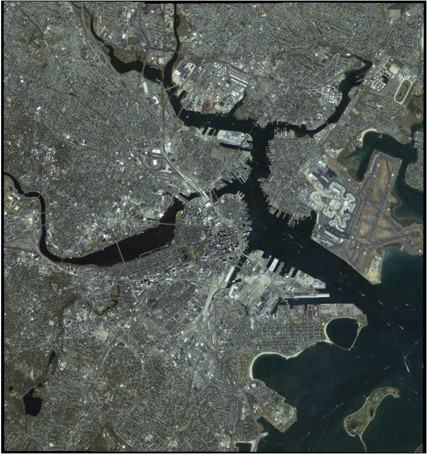

In [18]:
output_path = r'D:\Image\Img_rast.tif'
image.save(output_path)

# Open the TIF/raster file
tif_path = r'D:\Image\Img_rast.tif'

# Open the TIF file
img = Image.open(tif_path)

# Display the image
img.show()

In [22]:
#Descriptive Stats
print(img.format)
print(img.mode)
print(img.size)

TIFF
RGB
(427, 454)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


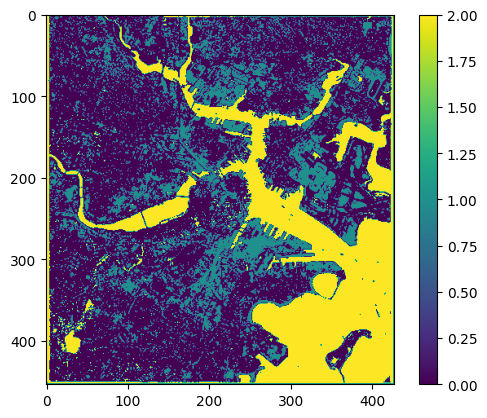

In [39]:
#Implement K-means Clustering on the raster file
#set work environment by calling libraries
from sklearn import cluster
from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt
#Mute exceptions comments, and register drivers
gdal.UseExceptions()
gdal.AllRegister()

# Open the raster file
tif_path = r'D:\Image\Img_rast.tif'
img = gdal.Open(tif_path)

# Using single band
band = img.GetRasterBand(1)

# Convert to an array of data
img_array = band.ReadAsArray()


# Implement K-means clustering
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(img_array.reshape(-1, 1))


# Get the labels assigned to each pixel
labels = kmeans.labels_.reshape(img_array.shape)

# Plot the clustered image
plt.imshow(labels, cmap='viridis')
plt.colorbar()
plt.show()

(75, 80)


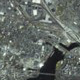

In [46]:
from PIL import Image

# Open the raster file
tif_path = r'D:\Image\Img_rast.tif'
img = Image.open(tif_path)

# Create a thumbnail with maximum size of (80, 80) while preserving the aspect ratio
img.thumbnail((80, 80))

# Report the size of the thumbnail
print(img.size)
# create a cropped image
cropped = image.crop((120, 150, 200, 230))
cropped.show()